# TensorFlow Core Learning Algorithms
In this notebook we will walk through one of the fundemental machine learning algorithm. We will apply this algorithm to unique problem and dataset before highlighting the use cases.

The algorithms we will focus on include:
- Classification

It is worth noting that there are many tools within TensorFlow that could be used to solve the problems we will see below. I have chosen the tools that I belive give the most variety and are easiest to use.<br/><br/>
<b>Disclameir</b> <br/>I have utilized most of the text from [Here](https://colab.research.google.com/drive/15Cyy2H7nT40sGR7TBN5wBvgTd57mVKay#forceEdit=true&sandboxMode=true&scrollTo=tUgsCvCHLksw)

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import tensorflow as tf
import seaborn as sns

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

UsageError: Line magic function `%tensorflow_version` not found.


## Dataset
> You can download the dataset from Kaggle website [Here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [3]:
# Import the dataset
dataset = pd.read_csv("creditcard.csv")

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Note:
> We do not have information about what these 28 V variables represent but we will treat them as numerical features

##  Split the data

In [5]:
# Seperate training and test data
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size =0.25, random_state=0)

<AxesSubplot:title={'center':'Distribution of Fraud vs Real Transactions'}>

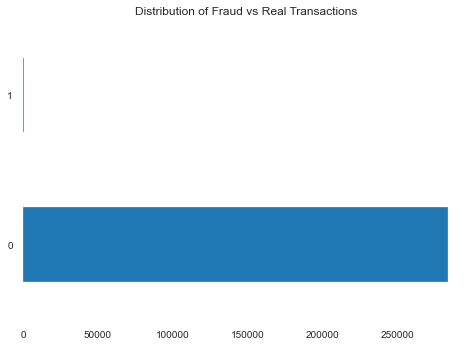

In [9]:
y.Class.value_counts().plot(kind='barh', title="Distribution of Fraud vs Real Transactions")

### Input Function
Well we need to make another one here! Fortunatly for us this one is a little easier to digest.

In [10]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [11]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in X.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='Time', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='V10', shape=(1,), default_va

### Building the Model
And now we are ready to choose a model. For classification tasks there are variety of different estimators/models that we can pick from. Some options are listed below.
- ```DNNClassifier``` (Deep Neural Network)

So let's build a model!

In [14]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Three hidden layers of 30, 10 and 10 nodes respectively.
    hidden_units=[30, 10, 10],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\patel\\AppData\\Local\\Temp\\tmpn4xettfh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Tip
> What we've just done is created a deep neural network that has three hidden layers. These layers have 30, 10 and 10 neurons respectively. However, it is worth mentioning that the number of hidden neurons is an arbitrary number and many experiments and tests are usually done to determine the best choice for these values. Try playing around with the number of hidden neurons and see if your results change.

In [19]:
classifier.train(
    input_fn=lambda: input_fn(X_train, y_train, training=True),
    steps=5000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\patel\AppData\Local\Temp\tmpn4xettfh\model.ckpt-5000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5000 into C:\Users\patel\AppData\Local\Temp\tmpn4xettfh\mo

### Evaluation
Now let's see how this trained model does!

In [21]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(X_test, y_test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-07T20:43:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\patel\AppData\Local\Temp\tmpn4xettfh\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 2.91626s
INFO:tensorflow:Finished evaluation at 2020-08-07-20:43:42
INFO:tensorflow:Saving dict for global step 10000

### Predictions
Now that we have a trained model it's time to use it to make predictions. I've written a little script below that allows you to type the features of a flower and see a prediction for its class.

In [54]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = X.columns.to_list()
Transcation_type = ["Not Fraud", "Fraud"]
predict = {}

# add values of X_test to predict
k = X_test.columns.to_list()
for j in range(len(X_test.iloc[12,:].values.tolist())):
    predict[k[j]] = [float(X_test.iloc[12,j])]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        Transcation_type[class_id], 100 * probability))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\patel\AppData\Local\Temp\tmpn4xettfh\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Not Fraud" (100.0%)
